In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("post_processed.csv", index_col = None)

In [3]:
df.head()

,Unnamed: 0,alti,drct,dwpf,feel,mslp,relh,sknt,tmpf,valid,vsby,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
0,0,30.099997,0.0,54.479617,57.7,1018.399996,94.332984,0.0,57.7,27-11-2020 00:15,5.300603,1,0,0,0,0
1,1,30.115998,0.0,53.059670,55.4,1018.899996,96.243318,0.0,55.4,27-11-2020 01:15,4.550471,1,0,0,0,0
2,2,30.118331,0.0,51.133041,53.2,1018.899996,97.334575,0.0,53.2,27-11-2020 02:15,2.958530,0,0,0,0,1
3,3,30.111109,0.0,49.833252,51.1,1019.000000,97.255306,0.0,51.1,27-11-2020 03:01,2.416838,1,0,0,0,0
4,4,30.107498,0.0,47.768617,48.9,1019.000000,97.175395,0.0,48.9,27-11-2020 04:01,1.453117,1,0,0,0,0


<AxesSubplot:>

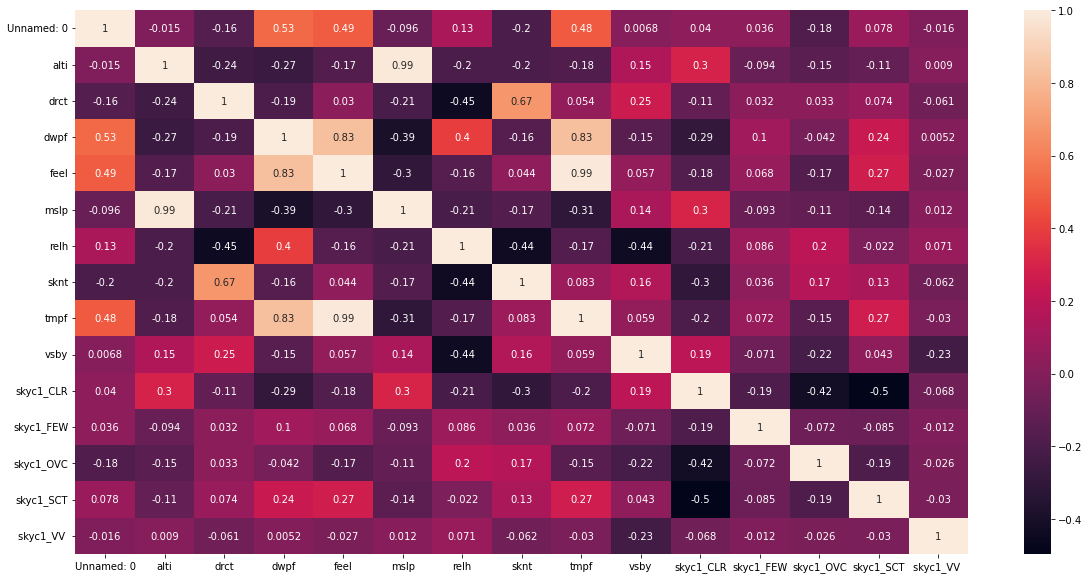

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), annot=True)

#### Dropping the feel and the valid column.  
#### Reason for dropping "feel" - redundant due to the tmpf column and low covariance with visibility
#### Reason for dropping "valid" - datetime column

In [5]:
df = df.drop(['feel'], axis=1)

In [6]:
df.head()

,Unnamed: 0,alti,drct,dwpf,mslp,relh,sknt,tmpf,valid,vsby,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
0,0,30.099997,0.0,54.479617,1018.399996,94.332984,0.0,57.7,27-11-2020 00:15,5.300603,1,0,0,0,0
1,1,30.115998,0.0,53.059670,1018.899996,96.243318,0.0,55.4,27-11-2020 01:15,4.550471,1,0,0,0,0
2,2,30.118331,0.0,51.133041,1018.899996,97.334575,0.0,53.2,27-11-2020 02:15,2.958530,0,0,0,0,1
3,3,30.111109,0.0,49.833252,1019.000000,97.255306,0.0,51.1,27-11-2020 03:01,2.416838,1,0,0,0,0
4,4,30.107498,0.0,47.768617,1019.000000,97.175395,0.0,48.9,27-11-2020 04:01,1.453117,1,0,0,0,0


### Training Data Creation

In [7]:
X_col =  ['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf', 'skyc1_CLR', 'skyc1_FEW', 'skyc1_OVC', 'skyc1_SCT',
       'skyc1_VV ']
Y_col = ['vsby']

In [8]:
X = df[X_col]
Y = df[Y_col]

In [9]:
X.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
0,30.099997,0.0,54.479617,1018.399996,94.332984,0.0,57.7,1,0,0,0,0
1,30.115998,0.0,53.059670,1018.899996,96.243318,0.0,55.4,1,0,0,0,0
2,30.118331,0.0,51.133041,1018.899996,97.334575,0.0,53.2,0,0,0,0,1
3,30.111109,0.0,49.833252,1019.000000,97.255306,0.0,51.1,1,0,0,0,0
4,30.107498,0.0,47.768617,1019.000000,97.175395,0.0,48.9,1,0,0,0,0


In [10]:
Y.head()

,vsby
0,5.300603
1,4.550471
2,2.958530
3,2.416838
4,1.453117


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [12]:
len(X_train)

6115

In [14]:
len(X_test)

2622

### Scaling the train and test set

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
X_train.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
5965,30.053997,209.985020,65.779806,1015.550009,55.937730,3.399920,82.8,1,0,0,0,0
5752,30.083996,206.666667,70.299739,1016.300007,54.521392,4.499964,88.0,1,0,0,0,0
2899,30.068746,228.750892,62.812304,1016.450002,54.034792,11.124563,81.0,0,0,0,0,0
7197,29.991998,244.009044,56.919761,1014.100011,81.166790,4.000357,62.8,1,0,0,0,0
2761,30.267998,79.989729,43.679770,1024.349995,77.396838,1.199846,51.1,1,0,0,0,0


In [75]:
X_test.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
8370,30.121996,138.001541,44.379707,1018.749995,37.575387,3.400077,73.8,1,0,0,0,0
984,30.185997,0.000000,30.839507,1022.349980,71.991030,0.000000,37.9,1,0,0,0,0
7110,30.103997,39.998431,71.479953,1017.500007,97.791837,1.799983,73.9,0,0,0,0,0
5906,30.031997,180.014551,73.399705,1014.450016,88.696603,2.200174,75.9,1,0,0,0,0
7060,30.087500,0.000000,69.724989,1017.700004,94.322433,0.000000,71.1,0,1,0,0,0


In [76]:
scaler = StandardScaler()
continuous_col = ['alti', 'drct', 'dwpf', 'mslp', 'relh', 'sknt', 'tmpf']
X_train.loc[:,continuous_col]= scaler.fit_transform(X_train.loc[:,continuous_col])

C:\Users\Rutuja\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [77]:
X_train.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
5965,-0.345743,0.717835,0.863027,-0.520180,-0.943603,-0.198330,1.416178,1,0,0,0,0
5752,-0.138556,0.685729,1.143432,-0.374529,-1.012992,0.159431,1.750315,1,0,0,0,0
2899,-0.243882,0.899403,0.678931,-0.345399,-1.036831,2.313914,1.300515,0,0,0,0,0
7197,-0.773943,1.047032,0.313373,-0.801774,0.292412,-0.003053,0.131035,1,0,0,0,0
2761,1.132252,-0.539924,-0.508001,1.188800,0.107716,-0.913848,-0.620773,1,0,0,0,0


In [78]:
X_test.loc[:,continuous_col]=scaler.transform(X_test.loc[:,continuous_col])

C:\Users\Rutuja\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [79]:
X_test.head()

,alti,drct,dwpf,mslp,relh,sknt,tmpf,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV
8370,0.123893,0.021365,-0.464579,0.101265,-1.843205,-0.198279,0.837864,1,0,0,0,0
984,0.565915,-1.313858,-1.304578,0.800392,-0.157124,-1.304068,-1.468968,1,0,0,0,0
7110,-0.000417,-0.926857,1.216649,-0.141485,1.106902,-0.718669,0.844289,0,0,0,0,0
5906,-0.497688,0.427858,1.335746,-0.733802,0.661311,-0.588517,0.972804,1,0,0,0,0
7060,-0.114358,-1.313858,1.107776,-0.102646,0.936930,-1.304068,0.664369,0,1,0,0,0


### Ridge Regression for Current Predictions

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [109]:
grid={"alpha":[0.01,0.1, 1,10],
      "fit_intercept": [True,False],
      "solver" : ['auto', 'svd', 'cholesky', 'lsqr']
     }

In [110]:
ridreg=Ridge()
ridreg_cv=GridSearchCV(ridreg,grid,cv=5)
ridreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",ridreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'fit_intercept': True, 'solver': 'svd'}


In [114]:
ridreg2=Ridge(alpha=0.1,fit_intercept=True, solver = 'svd')
ridreg2.fit(X_train,y_train)

1.8875339846613206

##### Train MSE for Ridge Regression

In [126]:
mean_squared_error(y_train, ridreg2.predict(X_train))

1.8875339846613206

##### Test MSE for Ridge Regression

In [127]:
mean_squared_error(y_test, ridreg2.predict(X_test))

1.9927944598843714

### Baseline Model - Train Average

In [131]:
y_train.head()

,vsby
5965,9.599937
5752,9.399906
2899,10.000000
7197,10.000000
2761,10.000000


##### Overall average of y_train is is the prediction for X_test in our baseline

In [137]:
train_avg = (y_train["vsby"].sum())/(len(y_train))
print(train_avg)

9.220581003043455


##### Test RMSE for Baseline

In [138]:
mean_squared_error(y_test,[train_avg]*len(y_test))

3.0374418420691702

### XGBoost

In [142]:
import xgboost as xgb

In [144]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [149]:
grid = {
     "eta" : [0.00, 0.10, 0.20, ] ,
     "max_depth" : [  5, 6, 8 ],
     "min_child_weight" : [ 3, 5, 7 ],
     "gamma" : [ 0.0, 0.1, 0.2, 0.4 ],
     }

In [151]:
xgb_model = xgb.XGBRegressor()
xgb_model_cv=GridSearchCV(xgb_model,grid,cv=5, scoring='neg_mean_squared_error')
xgb_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [152]:
print("tuned hpyerparameters :(best parameters) ",xgb_model_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'eta': 0.2, 'gamma': 0.0, 'max_depth': 8, 'min_child_weight': 5}


In [153]:
xgb_model2=xgb.XGBRegressor(eta=0.2,max_depth=8, min_child_weight = 5, gamma=0.0 )
xgb_model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.2, gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000003,
             max_delta_step=0, max_depth=8, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

##### Train MSE for XGBoost

In [154]:
mean_squared_error(y_train, xgb_model2.predict(X_train))

0.12194748771601115

##### Test MSE for XGBoost

In [156]:
mean_squared_error(y_test, xgb_model2.predict(X_test))

0.9978607212745725

### Summary for Current Predictions

Model             MSE
Baseline          3.0374
Ridge Regression  1.9927
XGBoost           0.9978